# Reconocimiento de dígitos con KNN



Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [1]:
%%script bash
cd .. && mkdir build
cd build/ && rm -rf *
cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
make install

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found PythonInterp: /home/orga2/anaconda3/envs/metodos/bin/python (found version "3.7.9") 
-- Found PythonLibs: /home/orga2/anaconda3/envs/metodos/lib/libpython3.7m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
-- Configuring done
-- Generating done
-- Build files have been written to: /home/orga2/Materias/MetNum/metodos-numericos-grupo-4/tp2/build
Scanning dependencies of target tp2
[ 10%] Building CXX object CMakeFiles/tp2.dir/src/

mkdir: cannot create directory ‘build’: File exists
Release mode
CMAKE_INSTALL_PREFIX=/home/orga2/Materias/MetNum/metodos-numericos-grupo-4/tp2


In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum


/home/orga2/Materias/MetNum/metodos-numericos-grupo-4/tp2/notebooks
Python 3.7.9


## Explorando los datos

In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd

df_train = pd.read_csv("../data/train.csv")

Es un csv, con columnas por cada pixel

In [4]:
df_train_reduced = df_train[:5000]

Manera de dividir el data set

In [5]:
# Uso values para mandar todo a arrays de numpy
X = df_train_reduced[df_train_reduced.columns[1:]].values
y = df_train_reduced["label"].values.reshape(-1, 1)

X.shape, y.shape

((5000, 784), (5000, 1))

Convierto el resto a matrices de 28 x 28

A ver cómo se ven...

Supuestamente es un 1


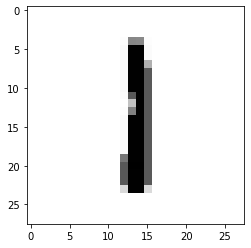

In [6]:
import matplotlib.pyplot as plt

num = 2

print(f"Supuestamente es un {int(y[num])}")

img = X[num].reshape(28, 28)
plt.imshow(img, cmap="Greys")


### Balance de clases

¿Tenemos la misma cantidad de cada número?

In [7]:
df_train_reduced["label"].value_counts(normalize=True)

1    0.1116
2    0.1090
6    0.1032
7    0.1012
0    0.0988
3    0.0960
9    0.0956
8    0.0954
4    0.0954
5    0.0938
Name: label, dtype: float64

In [8]:
limit = int(0.8 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")

Ahora tengo 4000 instancias de entrenamiento y 1000 de validación


No: tenemos más 1 que 5, pero tampoco está tan desbalanceado

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

knn = []
sklearn_knn = []
metric = []

# Acá pueden cambiar el clasificador nuestro por el de sklearn!
for i in range(5, 300, 5):

    clf = metnum.KNNClassifier(i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    knn_acc = accuracy_score(y_val, y_pred)
    knn.append(knn_acc)

    clf2 = KNeighborsClassifier(i)
    clf2.fit(X_train, y_train.ravel())
    y_pred = clf2.predict(X_val)
    sklearn_acc = accuracy_score(y_val, y_pred)
    sklearn_knn.append(sklearn_acc)

    metric.append(i)

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(metric, knn)
plt.plot(metric, sklearn_knn)

In [ ]:
plt.plot(metric, sklearn_knn)

In [ ]:
knn_max = []
sklearn_knn_max = []
metric_max = []

for i in range(1, 15):

    clf = metnum.KNNClassifier(i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    knn_acc = accuracy_score(y_val, y_pred)
    knn_max.append(knn_acc)

    clf2 = KNeighborsClassifier(i)
    clf2.fit(X_train, y_train.ravel())
    y_pred = clf2.predict(X_val)
    sklearn_acc = accuracy_score(y_val, y_pred)
    sklearn_knn_max.append(sklearn_acc)

    metric_max.append(i)

In [ ]:
plt.plot(metric_max, knn_max)

In [ ]:
plt.plot(metric_max, sklearn_knn_max)

In [ ]:
import metnum
pca_acc = []
metric_value = []
for i in range(10, 600, 10):
    
    pca = metnum.PCA(i)
    pca.fit(X_train)
    X = pca.transform(X_train)
    Y = pca.transform(X_val)
    
    clf = metnum.KNNClassifier(8)
    clf.fit(X, y_train)
    y_pred = clf.predict(Y)
    acc = accuracy_score(y_val, y_pred)
    pca_acc.append(acc)

    metric_value.append(i)

In [ ]:
#plt.plot(metric_value, pca_acc)
import matplotlib.pyplot as plt
# Data for plotting


fig, ax = plt.subplots()
ax.plot(metric_values, pca_acc, "o-")

ax.set(xlabel='PCA', ylabel='Accuracy',
       title='Analisis preliminar del comportamiento de PCA')
ax.grid()

fig.savefig("pca_exp1.png")
plt.show()

In [ ]:
%%time
pca_acc2 = []
metric_value2 = []
for i in range(5, 100, 5):
    
    pca = metnum.PCA(i)
    pca.fit(X_train)
    X = pca.transform(X_train)
    Y = pca.transform(X_val)
    
    clf = metnum.KNNClassifier(8)
    clf.fit(X, y_train)
    y_pred = clf.predict(Y)
    acc = accuracy_score(y_val, y_pred)
    pca_acc2.append(acc)

    metric_value2.append(i)

In [ ]:
#plt.plot(metric_value2, pca_acc2)
fig, ax = plt.subplots()
ax.plot(metric_values2, pca_acc2, "o-")

ax.set(xlabel='PCA', ylabel='Accuracy',
       title='Analisis preliminar del comportamiento de PCA')
ax.grid()

fig.savefig("pca_exp2.png")
plt.show()

In [ ]:
#plt.plot(metric_value2[3:], pca_acc2[3:])
fig, ax = plt.subplots()
ax.plot(metric_values2[3:], pca_acc2[3:], "o-")

ax.set(xlabel='PCA', ylabel='Accuracy',
       title='Analisis preliminar del comportamiento de PCA')
ax.grid()

fig.savefig("pca_exp2_reduced.png")
plt.show()

In [ ]:
%%time
pca_acc3 = []
metric_value3 = []
for i in range(30, 40):
    
    pca = metnum.PCA(i)
    pca.fit(X_train)
    X = pca.transform(X_train)
    Y = pca.transform(X_val)
    
    clf = metnum.KNNClassifier(8)
    clf.fit(X, y_train)
    y_pred = clf.predict(Y)
    acc = accuracy_score(y_val, y_pred)
    pca_acc3.append(acc)

    metric_value3.append(i)

In [ ]:
#plt.plot(metric_value3, pca_acc3)
fig, ax = plt.subplots()
ax.plot(metric_values3, pca_acc3, "o-")

ax.set(xlabel='PCA', ylabel='Accuracy',
       title='Analisis preliminar del comportamiento de PCA')
ax.grid()

fig.savefig("pca_exp3.png")
plt.show()

In [ ]:
np.argmax(pca_acc3)

In [ ]:
pca_acc3[4]

In [ ]:
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

limit = int(0.8 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

In [ ]:
%%time

pca = metnum.PCA(34)
pca.fit(X_train)
X = pca.transform(X_train)
Y = pca.transform(X_val)
    
clf = metnum.KNNClassifier(8)
clf.fit(X, y_train)
y_pred = clf.predict(Y)
acc = accuracy_score(y_val, y_pred)
acc

In [ ]:
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

limit = int(0.9 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

In [ ]:
%%time

pca = metnum.PCA(34)
pca.fit(X_train)
X = pca.transform(X_train)
Y = pca.transform(X_val)
    
clf = metnum.KNNClassifier(8)
clf.fit(X, y_train)
y_pred = clf.predict(Y)
acc = accuracy_score(y_val, y_pred)
acc

In [ ]:
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

limit = int(0.80 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

In [ ]:
%%time

pca = metnum.PCA(34)
pca.fit(X_train)
X = pca.transform(X_train)
Y = pca.transform(X_val)

In [ ]:
%%time

clf = metnum.KNNClassifier(8)
clf.fit(X, y_train)
y_pred = clf.predict(Y)
acc = accuracy_score(y_val, y_pred)
acc

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
print(precision_score(y_val, y_pred, average = "macro"))
print(recall_score(y_val, y_pred, average = "macro"))
print(confusion_matrix(y_val, y_pred))

In [ ]:
%%time
from KFoldXValidation import KfoldXvalidation
analisis = KfoldXvalidation(df_train, 5, 3, 34)

In [ ]:
print(analisis.accuracy())
print(analisis.precision())
print(analisis.recall())

In [ ]:
import seaborn as sns
from matplotlib.colors import LogNorm
ax = sns.heatmap(analisis.confusion_matrix()[2], norm=LogNorm(), cmap="Blues")
ax.set(xlabel='test labels', ylabel='predictions', title="Confusion Matrix Heatmap (log scale)")
plt.savefig("confusion_matrix_heatmap_log.png")
plt.show()
print(analisis.confusion_matrix()[2])

In [ ]:
ax = sns.heatmap(analisis.confusion_matrix()[2], cmap="Blues")
ax.set(xlabel='test labels', ylabel='predictions', title="Confusion Matrix Heatmap")
plt.show
print(analisis.confusion_matrix()[2])

In [11]:
df_sizes=[100, 500, 1000, 3000, 5000, 10000, 20000, 30000, 42000]
pca_ranges = [10, 20, 30, 40, 50]

In [ ]:
%%time
accuracies_lists = []
for i in df_sizes:
    df_train_i = df_train[:i]
    X = df_train_i[df_train_i.columns[1:]].values
    y = df_train_i["label"].values.reshape(-1, 1)

    limit = int(0.8 * X.shape[0]) 

    X_train, y_train = X[:limit], y[:limit]
    X_val, y_val = X[limit:], y[limit:]
    
    accuracies = []
    
    for j in range(10, 51, 10):
        pca = metnum.PCA(j)
        pca.fit(X_train)
        X = pca.transform(X_train)
        Y = pca.transform(X_val)
        
        clf = metnum.KNNClassifier(6)
        clf.fit(X, y_train)
        y_pred = clf.predict(Y)
        acc = accuracy_score(y_val, y_pred)
        
        accuracies.append(acc)
    
    accuracies_lists.append(accuracies)
    

In [ ]:
plt.figure(figsize=[10, 10])
for i in range(0, len(df_sizes)):
    plt.plot(pca_ranges, accuracies_lists[i])

In [ ]:
%%time
import metnum
from tqdm import tqdm
accuracies_lists2 = []
pca_ranges2 = range(31, 39)
for i in df_sizes:
    df_train_i = df_train[:i]
    X = df_train_i[df_train_i.columns[1:]].values
    y = df_train_i["label"].values.reshape(-1, 1)

    limit = int(0.8 * X.shape[0]) 

    X_train, y_train = X[:limit], y[:limit]
    X_val, y_val = X[limit:], y[limit:]
    
    accuracies2 = []
    
    for j in tqdm(range(31, 39)):
        pca = metnum.PCA(j)
        pca.fit(X_train)
        X = pca.transform(X_train)
        Y = pca.transform(X_val)
        
        clf = metnum.KNNClassifier(3)
        clf.fit(X, y_train)
        y_pred = clf.predict(Y)
        acc = accuracy_score(y_val, y_pred)
        
        accuracies2.append(acc)
    
    accuracies_lists2.append(accuracies2)

In [ ]:
plt.figure(figsize=[10, 10])
for i in range(0, len(df_sizes)):
    plt.plot(pca_ranges2, accuracies_lists2[i], marker = "o-",  label = str(df_sizes[i]))

plt.xlabel('PCA')
plt.ylabel('Accuracy')
plt.legend()


In [ ]:
for x in accuracies_lists2:
    print(pca_ranges2[np.argmax(x)])

In [16]:
%%time
from tqdm import tqdm
import metnum
from KFoldXValidation import KfoldXvalidation
accuracies_lists3 = []
pca_ranges3 = range(31, 39)
for i in df_sizes:
    df_train_i = df_train[:i]
    
    accuracies3 = []
    
    for j in tqdm(range(31, 39)):
        analisis = KfoldXvalidation(df_train_i, 5, 3, j)
        
        accuracies3.append(analisis.average_accuracy())
     
    accuracies_lists3.append(accuracies3)

  0%|          | 0/8 [00:00<?, ?it/s]/home/orga2/anaconda3/envs/metodos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
100%|██████████| 8/8 [23:52<00:00, 179.07s/it]

CPU times: user 1h 3min 45s, sys: 45.4 s, total: 1h 4min 31s
Wall time: 1h 4min 18s


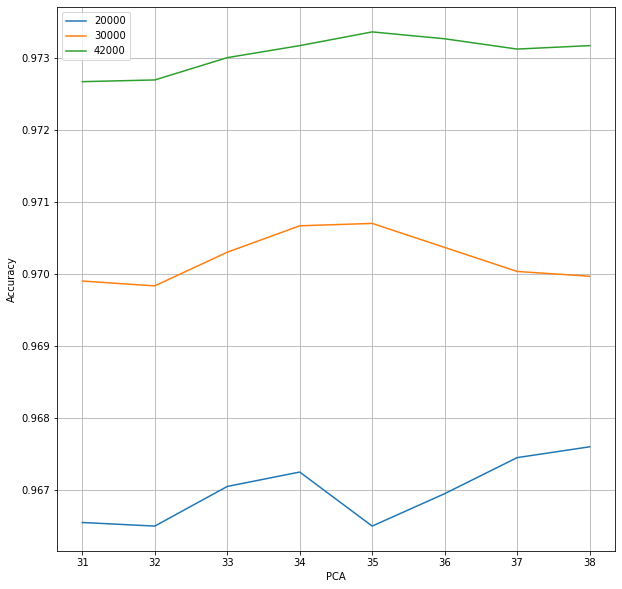

In [32]:
plt.figure(figsize=[10, 10])
for i in range(6, len(df_sizes)):
    plt.plot(pca_ranges3, accuracies_lists3[i], label = str(df_sizes[i]))

#plt.plot(pca_ranges3, accuracies_lists3[4], label = str(df_sizes[i]))
plt.grid()
plt.xlabel('PCA')
plt.ylabel('Accuracy')
plt.legend()

In [28]:
for x in accuracies_lists3:
    print(pca_ranges3[np.argmax(x)])

31
32
38
33
31
35
38
35
35


In [ ]:
%%time
from KFoldXValidation import KfoldXvalidation
from tqdm import tqdm

metric_Kfold_experiment = []
average_accuracy_Kfold_experiment = []
average_precision_Kfold_experiment = []
average_recall_Kfold_experiment = []

for i in tqdm(range(2, 100)):
    analisis = KfoldXvalidation(df_train, i, 3, 34)
    
    metric_Kfold_experiment.append(i)
    average_accuracy_Kfold_experiment.append(analisis.average_accuracy())
    average_precision_Kfold_experiment.append(analisis.average_precision())
    average_recall_Kfold_experiment.append(analisis.average_recall())

In [ ]:
plt.plot(metric_Kfold_experiment, average_accuracy_Kfold_experiment)
plt.plot(metric_Kfold_experiment, average_precision_Kfold_experiment)
plt.plot(metric_Kfold_experiment, average_recall_Kfold_experiment)
metric_Kfold_experiment[28]

In [ ]:
plt.plot(metric_Kfold_experiment[15:], average_accuracy_Kfold_experiment[15:])
plt.plot(metric_Kfold_experiment[15:], average_precision_Kfold_experiment[15:])
plt.plot(metric_Kfold_experiment[15:], average_recall_Kfold_experiment[15:])
metric_Kfold_experiment[28]

In [ ]:
plt.plot(metric_Kfold_experiment, average_accuracy_Kfold_experiment)

In [ ]:
plt.plot(metric_Kfold_experiment, average_precision_Kfold_experiment)

In [ ]:
plt.plot(metric_Kfold_experiment, average_recall_Kfold_experiment)

In [ ]:
%%time
metric_Kfold_experiment2 = []
average_accuracy_Kfold_experiment2 = []
average_precision_Kfold_experiment2 = []
average_recall_Kfold_experiment2 = []

for i in tqdm(range(43, 50)):
    analisis = KfoldXvalidation(df_train, i, 3, 34)
    
    metric_Kfold_experiment2.append(i)
    average_accuracy_Kfold_experiment2.append(analisis.average_accuracy())
    average_precision_Kfold_experiment2.append(analisis.average_precision())
    average_recall_Kfold_experiment2.append(analisis.average_recall())

In [ ]:
plt.plot(metric_Kfold_experiment2, average_precision_Kfold_experiment2)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns
from matplotlib.colors import LogNorm
df_train = pd.read_csv("../data/train.csv")
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

limit = int(0.8 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

In [44]:
%%time
pca = metnum.PCA(34)
pca.fit(X_train)
X = pca.transform(X_train)
Y = pca.transform(X_val)
clf = metnum.KNNClassifier(3)
clf.fit(X, y_train)

CPU times: user 9.45 s, sys: 494 ms, total: 9.95 s
Wall time: 10 s


In [45]:
%%time
y_pred2 = clf.predict(Y)

CPU times: user 30.6 s, sys: 173 ms, total: 30.8 s
Wall time: 30.7 s


0.974047619047619
0.9736776402081052
0.9740935810042618


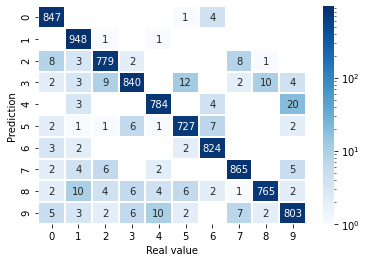

In [46]:
confusion_matrix(y_val,y_pred2)
sns.heatmap(confusion_matrix(y_val,y_pred2), cmap = "Blues", norm = LogNorm(), annot= True, fmt = 'd', linewidths = '1')
plt.xlabel('Real value')
plt.ylabel('Prediction')
print(accuracy_score(y_pred2, y_val))
print(precision_score(y_pred2, y_val, average = "macro"))
print(recall_score(y_pred2, y_val, average = "macro"))

In [47]:
%%time
clf = metnum.KNNClassifier(3)
clf.fit(X_train, y_train)

CPU times: user 126 ms, sys: 197 ms, total: 323 ms
Wall time: 323 ms


In [48]:
%%time
y_pred = clf.predict(X_val)

CPU times: user 2min 40s, sys: 668 ms, total: 2min 41s
Wall time: 2min 40s


0.9695238095238096
0.9686733164680661
0.9703460043541028


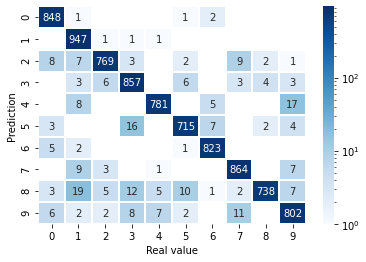

In [49]:
confusion_matrix(y_val,y_pred)
sns.heatmap(confusion_matrix(y_val,y_pred), cmap = "Blues", norm = LogNorm(), annot= True, fmt = 'd', linewidths = '1')
plt.xlabel('Real value')
plt.ylabel('Prediction')
print(accuracy_score(y_pred, y_val))
print(precision_score(y_pred, y_val, average = "macro"))
print(recall_score(y_pred, y_val, average = "macro"))

In [76]:
%%time
analisis1 = KfoldXvalidation(df_train, 5, 3, 0)

CPU times: user 16min 55s, sys: 5.37 s, total: 17min
Wall time: 16min 52s


In [77]:
%%time
analisis2 = KfoldXvalidation(df_train, 5, 3, 34)

CPU times: user 4min 19s, sys: 3.47 s, total: 4min 22s
Wall time: 4min 21s


In [80]:
print("accuracies kNN 3 sin PCA:", analisis1.accuracy())
print("average accuracy kNN 3 sin PCA:", analisis1.average_accuracy())
print("precisions kNN 3 sin PCA:", analisis1.precision())
print("average precision kNN 3 sin PCA:", analisis1.average_precision())
print("recalls kNN 3 sin PCA:", analisis1.recall())
print("average accuracy kNN 3 sin PCA:", analisis1.average_recall())

accuracies kNN 3 sin PCA: [0.97, 0.9672619047619048, 0.9627380952380953, 0.9638095238095238, 0.9695238095238096]
average accuracy kNN 3 sin PCA: 0.9666666666666668
precisions kNN 3 sin PCA: [0.9703153761645644, 0.9677006417485853, 0.9631692409847729, 0.9643175315923294, 0.9703460043541028]
average precision kNN 3 sin PCA: 0.967169758968871
recalls kNN 3 sin PCA: [0.9695998530005079, 0.9667248219820103, 0.9623004415009465, 0.9635010679620001, 0.9686733164680661]
average accuracy kNN 3 sin PCA: 0.9661599001827061


In [81]:
print("accuracies kNN 3 con PCA:", analisis2.accuracy())
print("average accuracy kNN 3 con PCA:", analisis2.average_accuracy())
print("precisions kNN 3 con PCA:", analisis2.precision())
print("average precision kNN 3 con PCA:", analisis2.average_precision())
print("recalls kNN 3 con PCA:", analisis2.recall())
print("average accuracy kNN 3 con PCA:", analisis2.average_recall())

accuracies kNN 3 con PCA: [0.9744047619047619, 0.9773809523809524, 0.968452380952381, 0.971547619047619, 0.974047619047619]
average accuracy kNN 3 con PCA: 0.9731666666666665
precisions kNN 3 con PCA: [0.97442816463101, 0.9774683364580088, 0.9683542234859521, 0.9717207821293687, 0.9740935810042618]
average precision kNN 3 con PCA: 0.9732130175417202
recalls kNN 3 con PCA: [0.9740953518442665, 0.9771286416161333, 0.9684582854230465, 0.9713128504077831, 0.9736776402081052]
average accuracy kNN 3 con PCA: 0.972934553899867
